In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv("PDB_Load_History.csv")

# View first rows
print(df.head())

# Dataset info
print(df.info())


       date  year  month  day  weekday  hour   demand  temperature
0  3/1/2003  2003      3    1        7     1  12863.0           29
1  3/1/2003  2003      3    1        7     2  12389.0           28
2  3/1/2003  2003      3    1        7     3  12155.0           29
3  3/1/2003  2003      3    1        7     4  12072.0           27
4  3/1/2003  2003      3    1        7     5  12160.0           29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103776 entries, 0 to 103775
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         103776 non-null  object 
 1   year         103776 non-null  int64  
 2   month        103776 non-null  int64  
 3   day          103776 non-null  int64  
 4   weekday      103776 non-null  int64  
 5   hour         103776 non-null  int64  
 6   demand       103776 non-null  float64
 7   temperature  103776 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.3+

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103776 entries, 0 to 103775
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         103776 non-null  int64  
 1   month        103776 non-null  int64  
 2   day          103776 non-null  int64  
 3   weekday      103776 non-null  int64  
 4   hour         103776 non-null  int64  
 5   temperature  103776 non-null  int64  
 6   demand       103776 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 5.5 MB


In [5]:
df = df[['year', 'month', 'day', 'weekday', 'hour', 'temperature', 'demand']]


In [6]:
# Fill numeric missing values with mean
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

# Final check
print(df.isnull().sum())


year           0
month          0
day            0
weekday        0
hour           0
temperature    0
demand         0
dtype: int64


In [7]:
X = df.drop('demand', axis=1)   # Features
y = df['demand']               # Target


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = model.predict(X_test)


In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics")
print("------------------------")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Model Evaluation Metrics
------------------------
MAE : 1876.0496700360475
RMSE: 2381.8550351713343
R²  : 0.2567325335471903


In [12]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coeff_df)


       Feature  Coefficient
0         year   -58.753577
1        month   -48.952671
2          day    -0.191456
3      weekday    32.539918
4         hour   202.407129
5  temperature    27.178777


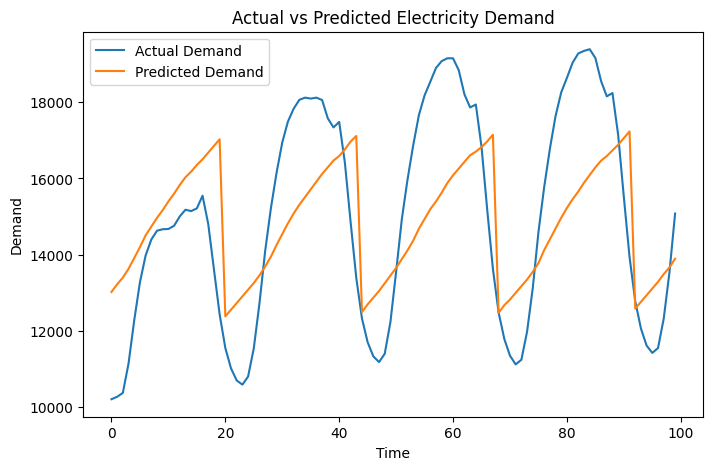

In [13]:
plt.figure(figsize=(8,5))
plt.plot(y_test.values[:100], label="Actual Demand")
plt.plot(y_pred[:100], label="Predicted Demand")
plt.legend()
plt.title("Actual vs Predicted Electricity Demand")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.show()
